In [78]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np

In [79]:
N = 2

QREG = QuantumRegister(N+1)
CREG = ClassicalRegister(N)

QC = QuantumCircuit(QREG, CREG)

QC.x(N)
QC.barrier()

for i in range(N+1):
    QC.h(i)

QC.barrier()

# for i in range(N):
#     QC.cx(i,N)

oracleType = 1
oracleValue = 1
a = np.random.randint(1,2**N)

if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        QC.x(QREG[N])
    else:
        QC.iden(QREG[N])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(N):
        if (a & (1 << i)):
            QC.cx(QREG[i], QREG[N])

QC.barrier()

# for i in range(N+1):
#     QC.h(i)

In [80]:
state = Statevector(QC)
state.draw(output="latex", )


<IPython.core.display.Latex object>

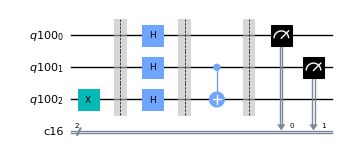

In [81]:
QC.measure(range(N), range(N))
QC.draw(output="mpl", scale=0.5)

Statevector([ 0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.70710678+8.65956056e-17j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2))


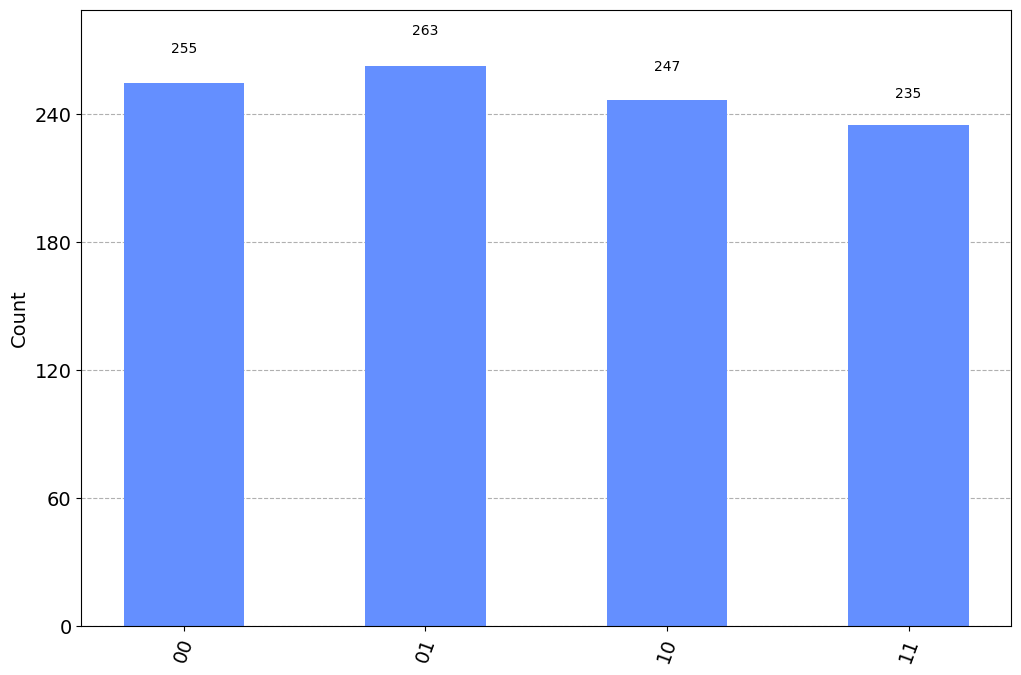

In [82]:
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

QC.save_statevector()   # Tell simulator to save statevector
result = backend.run(transpile(QC, backend), shots=1000).result()
out_state = result.get_statevector()
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(12,8))